# Monday, March 24th

- If you've not already done so, please send me an email if you plan to make edits to Project 2 or 3 based on feedback on Project 1.
- I've also pushed back the Tartans to Sunday night.
- We will start by looking at Projects 2, 3, 4 to answer questions you may have.

## Thoughts on tartans project:

### Padding out your tartan

Recall: your final tartan should be a `500` by `500` (by `3`) array. You will need to think about how to repeat your pattern to reach the desired size.

One strategy: duplicate your assigned pattern sufficiently many times to exceed the desired tartan size.

In [1]:
[1,2,3,4] * 5

[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4]

Once we have a pattern that exceeds the desired tartan size, we can take a slice of the generated tartan that has the correct size:

In [ ]:
generated_tartan[:500, :500]

Another strategy is to user modular division to iterate through your pattern until you've filled a `500` by `500` (by `3` array):

In [2]:
my_list = ['a','b','c','d','e','f','g']

In [5]:
for i in range(10):
    letter = my_list[i % len(my_list)]
    print(letter)

a
b
c
d
e
f
g
a
b
c


### Generating the authentic tartan pattern

You will need to work out how to generate the authentic tartan pattern.

For the checkerboard pattern, we could use four `if`/`elif`/`else` statements to decide whether to pull from the horizontal or vertical stripes:

In [ ]:
if i % 2 == 0 and j % 2 == 0:
    tartan[i,j] = horizontal_stripes[i,j]
elif i % 2 == 0 and j % 2 == 1:
    tartan[i,j] = vertical_stripes[i,j]
elif i % 2 == 1 and j % 2 == 0:
    tartan[i,j] = vertical_stripes[i,j]
else:
    tartan[i,j] = horizontal_stripes[i,j]

We could do the same for the authentic pattern, but we'd have sixteen `if`/`elif`/`else` statements.

In [ ]:
if i % 4 == 0 and j % 4 == 0:
    tartan[i,j] = horizontal_stripes[i,j]
elif i % 4 == 0 and j % 4 == 1:
    tartan[i,j] = horizontal_stripes[i,j]
elif i % 4 == 0 and j % 4 == 2:
    tartan[i,j] = vertical_stripes[i,j]
...
...

$1 / \left(\frac{1}{4}\right)$

$\frac{1}{\frac{1}{4}}$

In [8]:
import matplotlib.pyplot as plt
import numpy as np

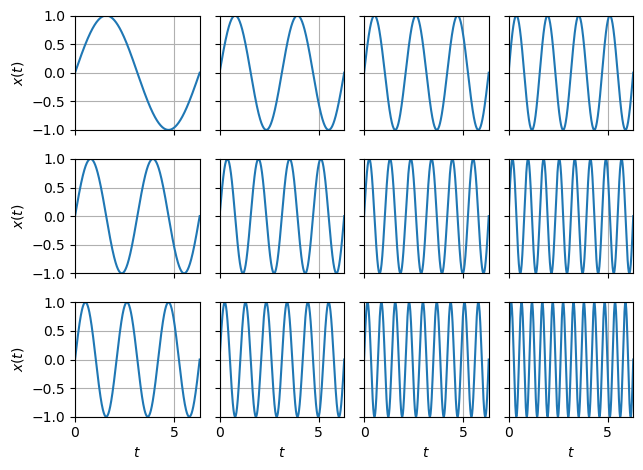

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=4)

t = np.linspace(0,2*np.pi,1000)

for i in range(3):
    for j in range(4):
        ax = axes[i,j]
        ax.plot(t,np.sin((i+1)*(j+1)*t))
        ax.grid()
        ax.set_xlim((0,2*np.pi))
        ax.set_ylim((-1,1))
        
for ax in axes[:,0]:
    ax.set_ylabel('$x(t)$')
for ax in axes[-1,:]:
    ax.set_xlabel('$t$')
for ax in axes[:,1:].flatten():
    ax.set_yticklabels([])
for ax in axes[:-1,:].flatten():
    ax.set_xticklabels([])
        
fig.tight_layout()

In [ ]:
%matplotlib inline

## A little more on working with strings:

In [31]:
s = 'This is a string.'

In [32]:
s.split('is')

['Th', ' ', ' a string.']

In [33]:
list_of_strings = ['Hello', 'my name is','Jon']

'1234'.join(list_of_strings)

'Hello1234my name is1234Jon'

We can also use the `.replace` method to substitute a string for a substring:

In [34]:
print(s)

This is a string.


In [36]:
s.replace('is', '!!Hello!!')

'Th!!Hello!! !!Hello!! a string.'

In [ ]:
N = 1000

ptriples = get_ptripes(N)

In [ ]:
slopes = [5/12, 3/4]
colors = ['b','r']

for slope,color in zip(slopes,colors):
    plt.plot([0,N], [0, N*slope], color=color)
    plt.plot([0,N], [0, N/slope], color=color)

# Wednesday, March 26th

## Image denoising project

I've downloaded the `hamburg.png` image from the project page into my Jupyter notebook directory, so let's open it:

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
hamburg = plt.imread('hamburg.png')

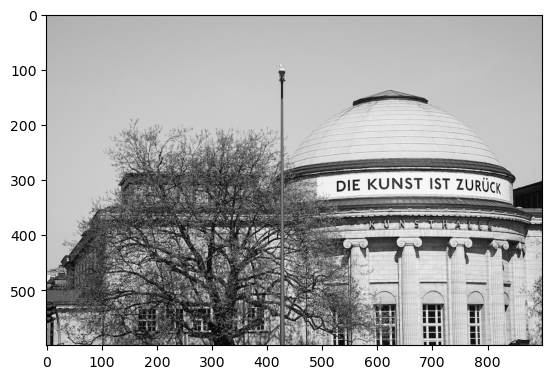

In [3]:
plt.imshow(hamburg)

What is the structure of this array that we've loaded?

In [4]:
print(hamburg.shape)

(600, 900, 3)


This array has `600` rows (meaning our image is `600` pixels tall), `900` columns (meaning our image is `900` pixels wide), and has `3` color channels (namely, red/green/blue).

For this project, we would like to work with grayscale values rather than RGB values. In other words, we want to collapse the three color channels down to just one.

In [6]:
(hamburg[:,:,0] == hamburg[:,:,1]).min()

True

In [7]:
(hamburg[:,:,0] == hamburg[:,:,2]).min()

True

In [8]:
(hamburg[:,:,1] == hamburg[:,:,2]).min()

True

Since our image contains purely gray pixels (i.e. the red, green, blue channels all match), we can simply take one of the three channels to get a grayscale value:

In [9]:
hamburg_gray = hamburg[:,:,0]  # Take just the red-channel information

print(hamburg_gray.shape)

(600, 900)


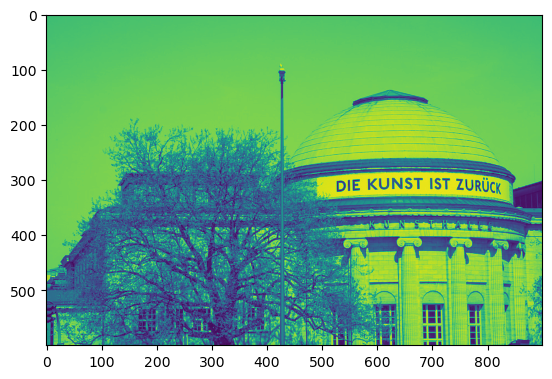

In [10]:
plt.imshow(hamburg_gray)

We need to specify our colormap, in particular, `cmap='gray'`.

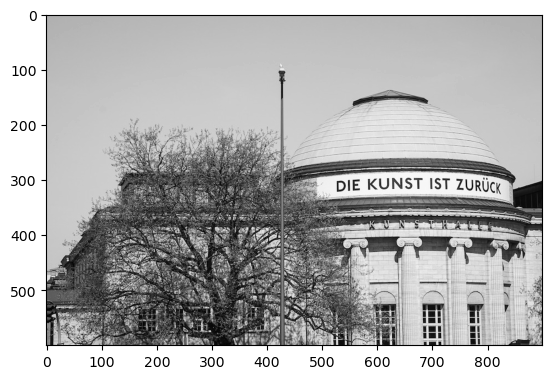

In [11]:
plt.imshow(hamburg_gray, cmap='gray')

To be safe, let's specify `vmin=0` and `vmax=1` to make sure that `plt.imshow` is correctly drawing our grayscale values:

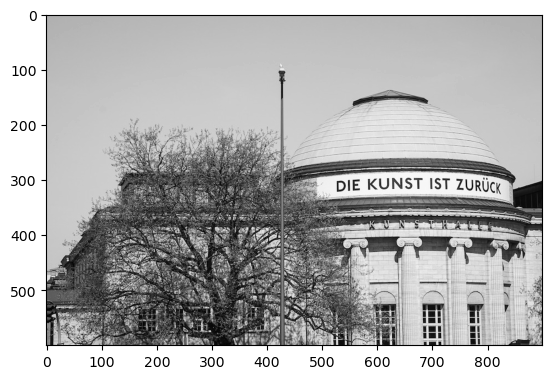

In [12]:
plt.imshow(hamburg_gray, cmap='gray', vmin=0, vmax=1)

### Aside on obtaining grayscale images:

For the above image, we started with a grayscale image represented as an RGB array. What if we start from a full-color image?

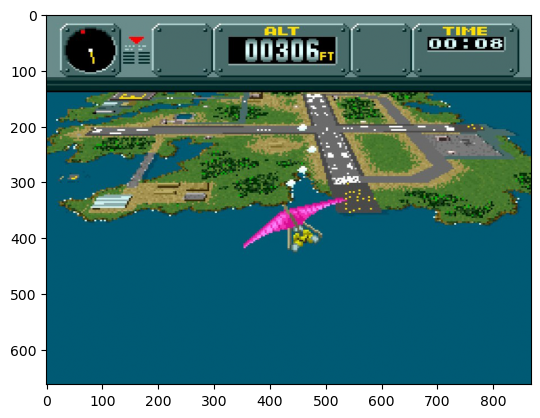

In [19]:
# The "Pilotwings.jpg" file has integer RGB values
# We will rescale by 255 to get floating point values
pilotwings = plt.imread('Pilotwings.jpg') / 255

plt.imshow(pilotwings)

In [20]:
print(pilotwings.shape)

(662, 868, 3)


How can we generate a grayscale version of this image?

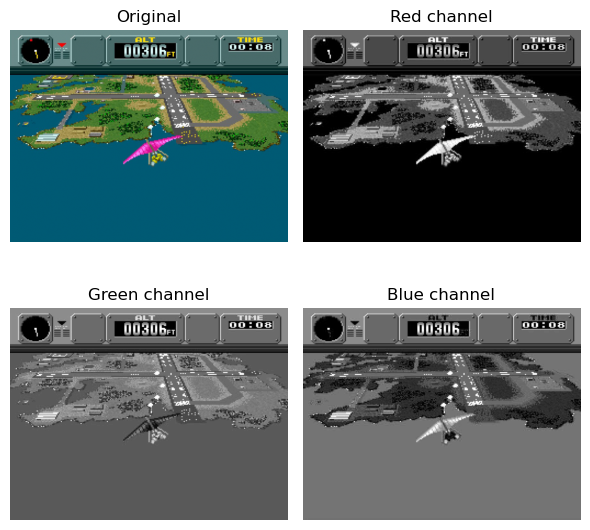

In [24]:
pilotwings_red = pilotwings[:,:,0]
pilotwings_green = pilotwings[:,:,1]
pilotwings_blue = pilotwings[:,:,2]

fig = plt.figure(figsize=(6,6))

plt.subplot(2,2,1)
plt.imshow(pilotwings)
plt.title('Original')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(pilotwings_red, cmap='gray', vmin=0, vmax=1)
plt.title('Red channel')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(pilotwings_green, cmap='gray', vmin=0, vmax=1)
plt.title('Green channel')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(pilotwings_blue, cmap='gray', vmin=0, vmax=1)
plt.title('Blue channel')
plt.axis('off')

plt.tight_layout()

We could average the three color channels together to get a more representative grayscale array:

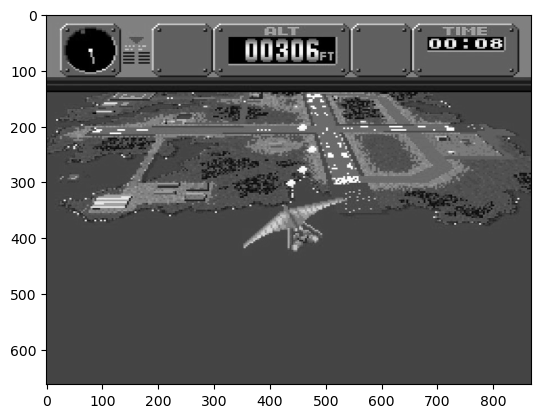

In [26]:
pilotwings_gray = (pilotwings_red + pilotwings_green + pilotwings_blue) / 3

plt.imshow(pilotwings_gray, cmap='gray', vmin=0, vmax=1)

Note: we can compute this mean more immediately using the `.mean` method:

In [28]:
pilotwings.shape

(662, 868, 3)

In [29]:
pilotwings.mean()

0.31333053248587234

In [30]:
help(pilotwings.mean)

Help on built-in function mean:

mean(...) method of numpy.ndarray instance
    a.mean(axis=None, dtype=None, out=None, keepdims=False, *, where=True)
    
    Returns the average of the array elements along given axis.
    
    Refer to `numpy.mean` for full documentation.
    
    See Also
    --------
    numpy.mean : equivalent function



We can supply an optional argument `axis=2` to compute means only along the color channel axis:

In [31]:
pilotwings_gray = pilotwings.mean(axis=2)

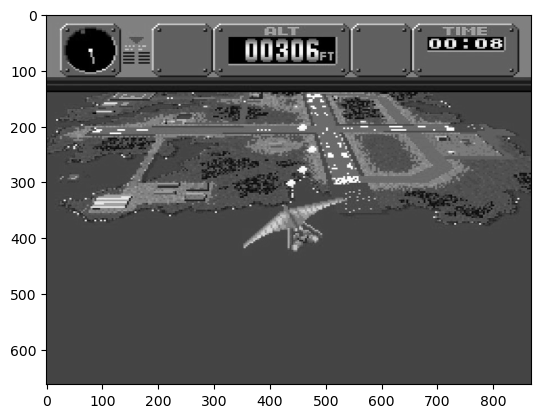

In [32]:
plt.imshow(pilotwings_gray, cmap='gray', vmin=0, vmax=1)

## Back to Image Denoising project:

First, let's think about how to add salt/pepper noise to an image:

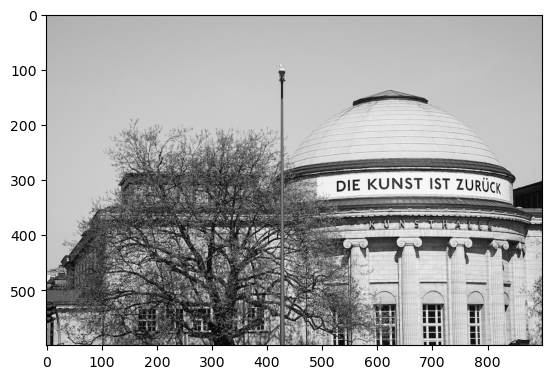

In [33]:
plt.imshow(hamburg, cmap='gray', vmin=0, vmax=1)

First, let's make a copy of our array that we can add noise to. This way, we don't mess up our original image and can make comparisons to the noisy and filtered images.

In [48]:
noisy_hamburg = hamburg_gray.copy()
print(noisy_hamburg.shape)

(600, 900)


In [52]:
# Adding a "salt" pixel in the 595th row, 310th column

noisy_hamburg[595, 310] = 1

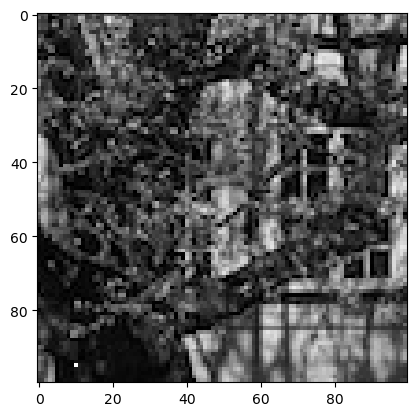

In [51]:
plt.imshow(noisy_hamburg[500:600, 300:400], cmap='gray', vmin=0, vmax=1)

We would like to be able to randomly introduce salt and pepper noise. We can use the `np.random.random` function to help us:

In [53]:
help(np.random.random)

Help on built-in function random:

random(...) method of numpy.random.mtrand.RandomState instance
    random(size=None)
    
    Return random floats in the half-open interval [0.0, 1.0). Alias for
    `random_sample` to ease forward-porting to the new random API.



In [54]:
np.random.random((2,3))

array([[0.2514366 , 0.36664375, 0.79228544],
       [0.00320436, 0.02930152, 0.83712674]])

Strategy: let's generate an array of the same shape as our image filled with randomly drawn values between `0` and `1`. If the randomly drawn value is greater than, say `.9`, we'll add salt noise in that position.

In [55]:
num_rows, num_cols = hamburg_gray.shape
random_array = np.random.random((num_rows, num_cols))

for i in range(num_rows):
    for j in range(num_cols):
        # We're considering the pixel in the ith row, jth column
        if random_array[i,j] > .9:  # If the random value is greater than .9
            noisy_hamburg[i,j] = 1  # add salt noise

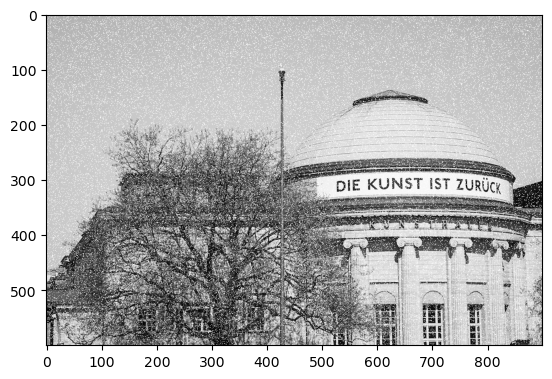

In [57]:
plt.imshow(noisy_hamburg, cmap='gray', vmin=0, vmax=1)

What if we want to add pepper noise as well?

In [58]:
noisy_hamburg = hamburg_gray.copy()
num_rows, num_cols = hamburg_gray.shape
random_salt_array = np.random.random((num_rows, num_cols))
random_pepper_array = np.random.random((num_rows, num_cols))

for i in range(num_rows):
    for j in range(num_cols):
        # We're considering the pixel in the ith row, jth column
        if random_salt_array[i,j] > .9:  # If the random value is greater than .9
            noisy_hamburg[i,j] = 1  # add salt noise
        if random_pepper_array[i,j] > .9:# If the random value is greater than .9
            noisy_hamburg[i,j] = 0  # add pepper noise

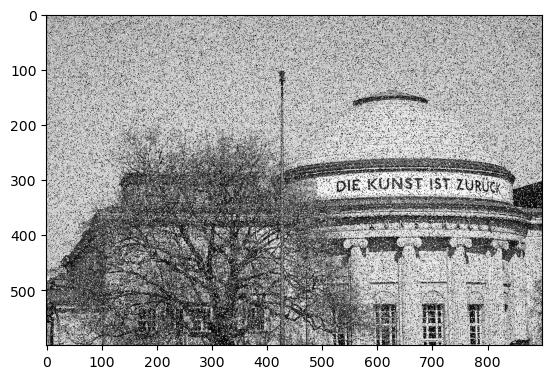

In [59]:
plt.imshow(noisy_hamburg, cmap='gray', vmin=0, vmax=1)

Note: the implementation above gives a preference to pepper noise, since it's possible for salt pixels to be overwritten as pepper (but not the reverse). Instead, let's use a single random array, but select select different subintervals between `0` and `1` to identify salt/pepper noise:

In [63]:
noisy_hamburg = hamburg_gray.copy()
num_rows, num_cols = hamburg_gray.shape
random_array = np.random.random((num_rows, num_cols))

for i in range(num_rows):
    for j in range(num_cols):
        # We're considering the pixel in the ith row, jth column
        if random_array[i,j] < .1:  # If the random value is less than .1
            noisy_hamburg[i,j] = 0  # add pepper noise
        if random_array[i,j] > .9:  # If the random value is greater than .9
            noisy_hamburg[i,j] = 1  # add salt noise

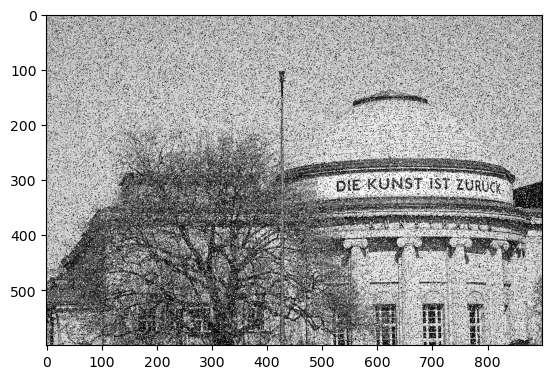

In [64]:
plt.imshow(noisy_hamburg, cmap='gray', vmin=0, vmax=1)

**Exercise.** Use the above sample code to write a function `sp_noise(img, noise)` that adds salt and pepper noise to an image. Its first argument img should be a 2-dimensional numpy array representing the image and the second argument noise should be the fraction of pixels that are to be replaced by noise (for example, with noise = 0.05 about 5% of pixels should be noise, consisting in roughly equal parts of white and black pixels). The function should return a 2-dimensional numpy array representing the original image with noise added.